In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [43]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))

In [44]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

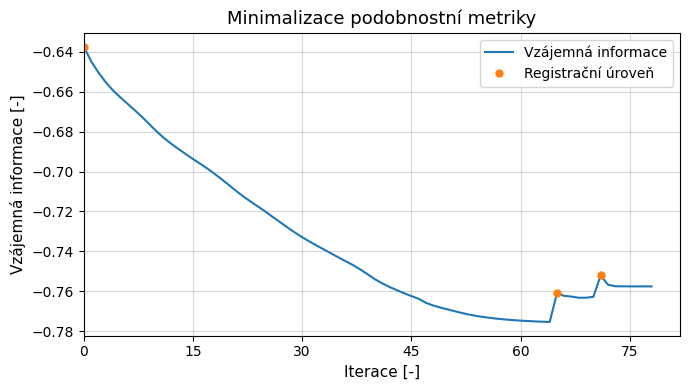

In [9]:
def plotMetricValues(metric_values, multires_iters, save):
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    ax_metric.plot(multires_iters, metric_values[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6.)
    ax_metric.set_xlabel("Iterace [-]", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace [-]", fontsize=11)
    ax_metric.set_title("Minimalizace podobnostní metriky", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_metric.grid(alpha=0.5)
    ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")

plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], save=True)

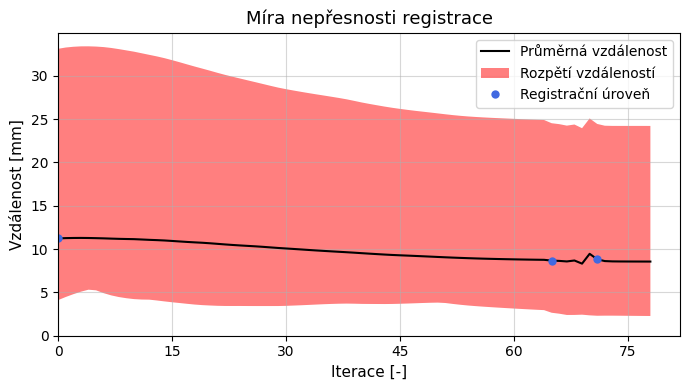

In [10]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, save=False):
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozpětí vzdáleností")
    ax_tre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none",
                  markeredgecolor="none", markersize=6., c="royalblue")
    ax_tre.set_xlabel("Iterace [-]", fontsize=11)
    ax_tre.set_ylabel("Vzdálenost [mm]", fontsize=11)
    ax_tre.set_title("Míra nepřesnosti registrace", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")

plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], save=True)

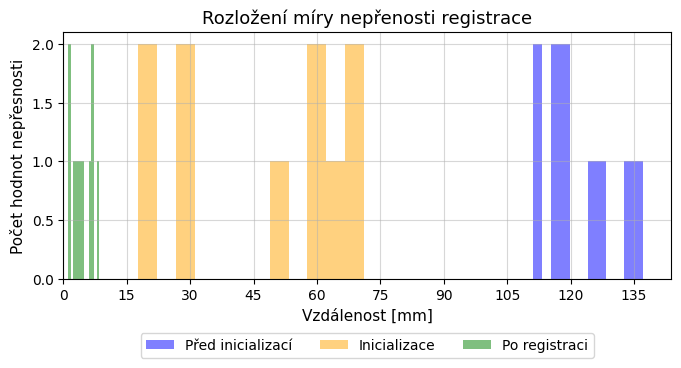

In [45]:
def plotErrorHistogram(error_values, save=False):
    fig_hist, ax_hist = plt.subplots(1, 1, figsize=(7, 4))
    ax_hist.hist(error_values[0, :], bins=12, alpha=0.5, label="Před inicializací", color="blue")
    ax_hist.hist(error_values[1, :], bins=12, alpha=0.5, label="Inicializace", color="orange")
    ax_hist.hist(error_values[-1, :], bins=12, alpha=0.5, label="Po registraci", color="green")
    ax_hist.set_xticks(np.arange(0, error_values[0, :].max() + 10, 15))
    # ax_hist.set_yticks(np.arange(0, , dtype=int))
    ax_hist.set_xlim([0, None])
    ax_hist.set_ylim([0, None])
    ax_hist.set_xlabel("Vzdálenost [mm]", fontsize=11)
    ax_hist.set_ylabel("Počet hodnot nepřesnosti", fontsize=11)
    ax_hist.set_title("Rozložení míry nepřenosti registrace", fontsize=13)
    ax_hist.grid(alpha=0.5)
    ax_hist.legend(loc="lower center", ncols=3, bbox_to_anchor=(0.5, -0.35))
    fig_hist.tight_layout()
    plt.show()
    
    if save:
        fig_hist.savefig(f"{regDir}pacient{patientNumber}Hist{view.upper()}.pdf", bbox_inches="tight")

plotErrorHistogram(errorsInfo["errorValues"], save=False)

In [49]:
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
gradientErrors = np.zeros(shape=(10, 3, 12))

for idx, num in enumerate(patNumbers):
    errors = np.load(f"input_files\\pacient_{num}\\"
                     f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradientErrors[:, 0, idx] = errors[0, :]
    gradientErrors[:, 1, idx] = errors[1, :]
    gradientErrors[:, 2, idx] = errors[-1, :]

# errors = np.load(f"input_files\\pacient_09\\"
#                  f"registration\\gradient\\pacient09ErrorsInfo{view.upper()}.npz")["errorValues"]
# gradientErrors[:, 0, 0] = errors[0, :]
# gradientErrors[:, 1, 0] = errors[1, :]
# gradientErrors[:, 2, 0] = errors[-1, :]

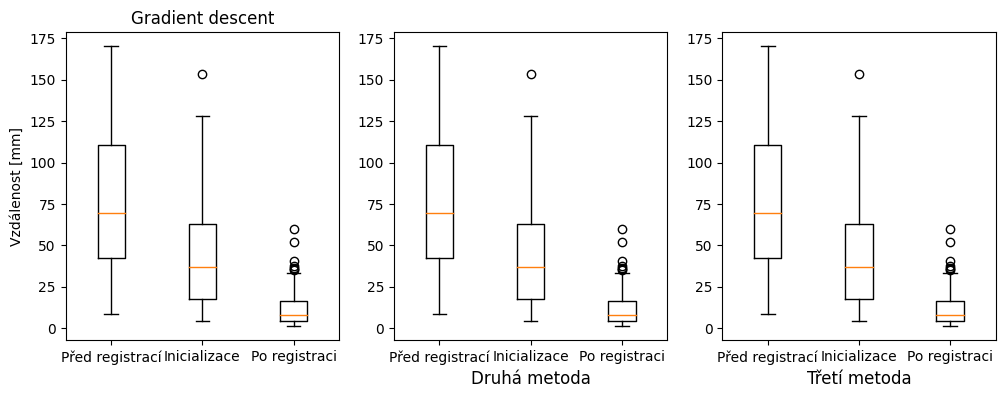

In [78]:
# fig_hist, ax_hist = plt.subplots(1, 1, figsize=(7, 4))
# ax_hist.hist(gradientErrors[:, 0, 8], bins=12, alpha=0.5, label="Před inicializací", color="blue")
# ax_hist.hist(gradientErrors[:, 1, 8], bins=12, alpha=0.5, label="Inicializace", color="orange")
# ax_hist.hist(gradientErrors[:, 2, 8], bins=12, alpha=0.5, label="Po registraci", color="green")
# ax_hist.set_xticks(np.arange(0, gradientErrors[:, 0, 8].max() + 10, 15))
# # ax_hist.set_yticks(np.arange(0, , dtype=int))
# ax_hist.set_xlim([0, None])
# ax_hist.set_ylim([0, None])
# ax_hist.set_xlabel("Vzdálenost [mm]", fontsize=11)
# ax_hist.set_ylabel("Počet hodnot nepřesnosti", fontsize=11)
# ax_hist.set_title("Rozložení míry nepřenosti registrace", fontsize=13)
# ax_hist.grid(alpha=0.5)
# ax_hist.legend(loc="lower center", ncols=3, bbox_to_anchor=(0.5, -0.35))
# fig_hist.tight_layout()
# plt.show()


# plt.hist(gradientErrors[:, 0, 8], bins=12)
# plt.hist(gradientErrors[:, 1, 8], bins=12)
# plt.hist(gradientErrors[:, 2, 8], bins=12)
# plt.show()

labels=["Před registrací", "Inicializace", "Po registraci"]

fig_box, ax_box = plt.subplots(1, 3, figsize=(12, 4))
ax_box[0].boxplot([gradientErrors[:, 0].ravel(),
                gradientErrors[:, 1].ravel(),
                gradientErrors[:, 2].ravel()], labels=labels)
#ax_box[0].set_xlabel("Gradient descent", fontsize=12)
ax_box[0].set_title("Gradient descent")
ax_box[0].set_ylabel("Vzdálenost [mm]")

ax_box[1].boxplot([gradientErrors[:, 0].ravel(),
                gradientErrors[:, 1].ravel(),
                gradientErrors[:, 2].ravel()], labels=labels)
ax_box[1].set_xlabel("Druhá metoda", fontsize=12)

ax_box[2].boxplot([gradientErrors[:, 0].ravel(),
                gradientErrors[:, 1].ravel(),
                gradientErrors[:, 2].ravel()], labels=labels)
ax_box[2].set_xlabel("Třetí metoda", fontsize=12)
plt.show()